In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Step 1: Load the CSV file
df = pd.read_csv('FinalModelResults_TrueLabels.csv')
df = df.iloc[:, 1:]

# Step 2: Separate the predictions (features) and the true labels
X = df.drop(columns=['True_Preds', 'max_count'])  
y = df['True_Preds']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Step 4: Train the XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)  # Assuming 4 classes
xgb_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8976


2024-08-05 13:52:56.808056: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-05 13:52:57.047843: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-05 13:52:57.047871: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-05 13:52:57.049104: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-05 13:52:57.156611: I tensorflow/core/platform/cpu_feature_g

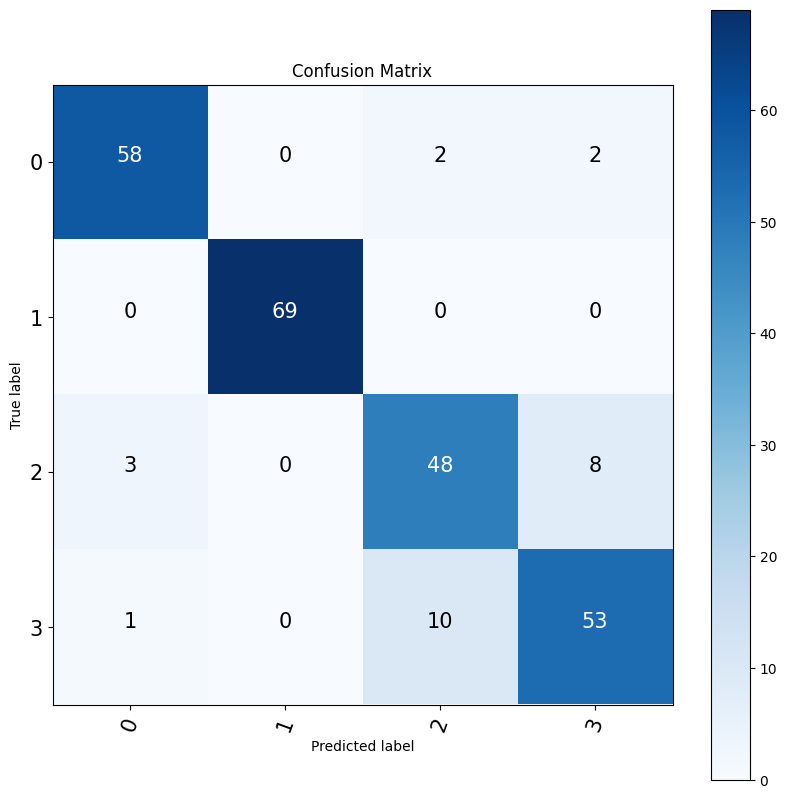

In [2]:
import utils

utils.make_confusion_matrix(y_test, y_pred)

In [46]:
utils.calc_evaluation_metrics(y_pred, y_test)

{'Accuracy': 89.76377952755905,
 'Precision': 0.8975804500867477,
 'Recall': 0.8975804500867477,
 'F1-Score': 0.8975828287791029}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

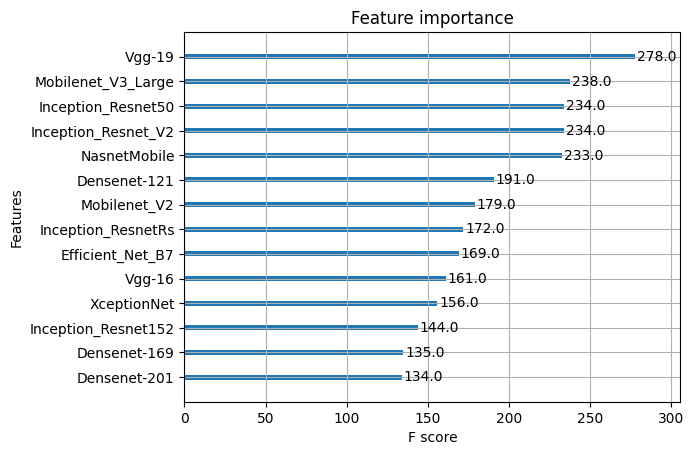

In [47]:
xgb.plot_importance(xgb_model)
